In [1]:
import numpy as np
import pandas as pd
from seaborn import load_dataset, heatmap
import matplotlib.pyplot as plt

In [2]:
data = load_dataset('mpg')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
data['high_mpg'] = np.where(data['mpg'] > 30, 'yes', 'no')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,high_mpg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,no
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,no
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,no
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,no
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,no
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,no
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,yes
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,yes
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,no


In [4]:
data = data.drop(columns=['mpg'])
data

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,high_mpg
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,no
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,no
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,no
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,no
4,8,302.0,140.0,3449,10.5,70,usa,ford torino,no
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,no
394,4,97.0,52.0,2130,24.6,82,europe,vw pickup,yes
395,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,yes
396,4,120.0,79.0,2625,18.6,82,usa,ford ranger,no


In [5]:
data.isna().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
high_mpg        0
dtype: int64

In [6]:
data.isnull().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
high_mpg        0
dtype: int64

In [7]:
data.isin(['',' ','-']).sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
high_mpg        0
dtype: int64

In [8]:
from scipy.stats import shapiro

In [9]:
stats, p_value = shapiro(data['horsepower'].dropna())
p_value

5.0220692907916354e-15

p-value < 0.05, so we will replace the missing values with median.

In [10]:
data = data.drop(columns=['name'])
data

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,high_mpg
0,8,307.0,130.0,3504,12.0,70,usa,no
1,8,350.0,165.0,3693,11.5,70,usa,no
2,8,318.0,150.0,3436,11.0,70,usa,no
3,8,304.0,150.0,3433,12.0,70,usa,no
4,8,302.0,140.0,3449,10.5,70,usa,no
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,usa,no
394,4,97.0,52.0,2130,24.6,82,europe,yes
395,4,135.0,84.0,2295,11.6,82,usa,yes
396,4,120.0,79.0,2625,18.6,82,usa,no


In [11]:
data.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [12]:
data.loc[data['horsepower'].isna(),'horsepower'] = np.median(data['horsepower'].dropna())
data['horsepower'].isna().sum()

0

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [14]:
tmp = {'usa':0,'japan':1,'europe':2}
data['origin'] = data['origin'].map(tmp)
data


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,high_mpg
0,8,307.0,130.0,3504,12.0,70,0,no
1,8,350.0,165.0,3693,11.5,70,0,no
2,8,318.0,150.0,3436,11.0,70,0,no
3,8,304.0,150.0,3433,12.0,70,0,no
4,8,302.0,140.0,3449,10.5,70,0,no
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,0,no
394,4,97.0,52.0,2130,24.6,82,2,yes
395,4,135.0,84.0,2295,11.6,82,0,yes
396,4,120.0,79.0,2625,18.6,82,0,no


In [15]:
scaler = RobustScaler()
df_scaled = scaler.fit_transform(data.drop(columns=['high_mpg']))

pca = PCA()
pca.fit(df_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(data.drop(columns=['high_mpg']).columns))], index=data.drop(columns=['high_mpg']).columns)
print("Loadings:\n", loadings_df)

Loadings:
                    PC1       PC2       PC3       PC4       PC5       PC6  \
cylinders     0.385315 -0.055837  0.068061  0.069796 -0.099137 -0.066907   
displacement  0.629038 -0.086101  0.096508  0.096422 -0.086784 -0.050802   
horsepower    0.741195  0.101450  0.060755  0.122926  0.168874 -0.037750   
weight        0.542642 -0.110828  0.146607  0.173180 -0.030103  0.122302   
acceleration -0.594278 -0.418663  0.372309  0.089584  0.044710 -0.023647   
model_year   -0.266665 -0.225211 -0.371140  0.346506  0.007117 -0.009817   
origin       -0.484199  0.512674  0.184291  0.262279 -0.025659 -0.005534   

                   PC7  
cylinders     0.073789  
displacement -0.071208  
horsepower    0.008703  
weight        0.013018  
acceleration -0.000855  
model_year   -0.001313  
origin       -0.004105  


In [16]:
data = data[['displacement','horsepower','acceleration','high_mpg']]
data

,displacement,horsepower,acceleration,high_mpg
0,307.0,130.0,12.0,no
1,350.0,165.0,11.5,no
2,318.0,150.0,11.0,no
3,304.0,150.0,12.0,no
4,302.0,140.0,10.5,no
...,...,...,...,...
393,140.0,86.0,15.6,no
394,97.0,52.0,24.6,yes
395,135.0,84.0,11.6,yes
396,120.0,79.0,18.6,no


In [17]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['high_mpg']),data['high_mpg'],
                                                   test_size=0.2,random_state=37)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

results = pd.DataFrame(
    {'Actual':y_test,
    'Predicted':y_pred}
)
results

,Actual,Predicted
361,no,no
198,yes,yes
161,no,no
276,no,no
318,no,no
...,...,...
377,yes,yes
252,no,no
6,no,no
147,no,no


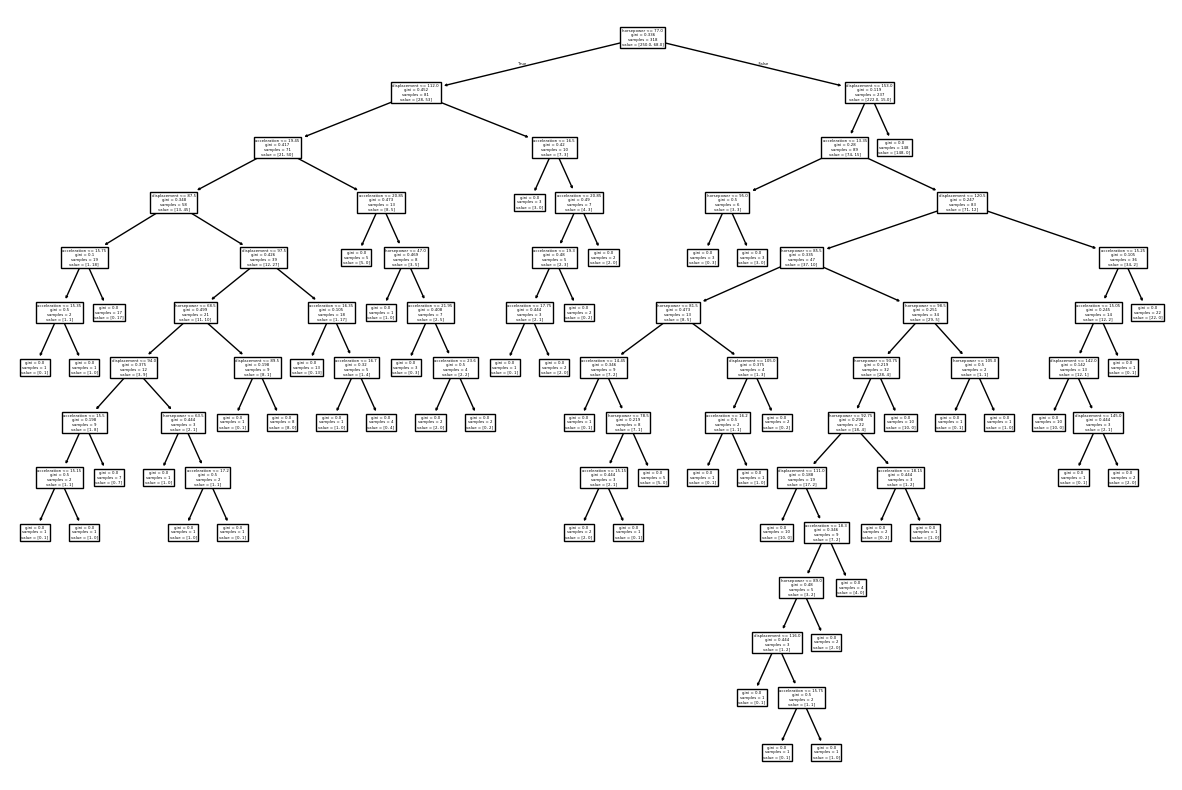

In [19]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,feature_names=data.columns)
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix

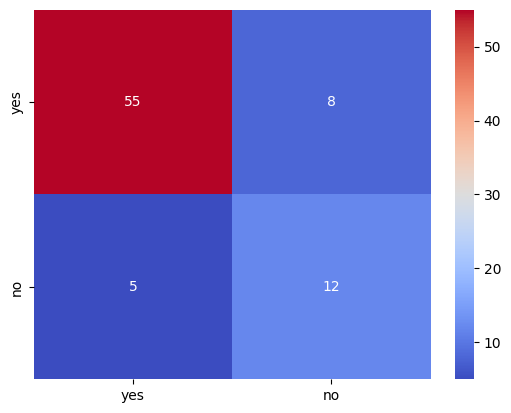

In [21]:
cm = confusion_matrix(y_test,y_pred)
labels = ['yes','no']
heatmap(cm,annot=True,cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.show()

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [23]:
y_pred

array(['no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes'], dtype=object)

In [24]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accuracy: 0.8375
Precision: 0.7583333333333333
Recall: 0.7894491129785248
F1: 0.7714787958690398


In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_values = np.arange(1, 101, 1)
param_grid = {'max_depth': param_values}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(data.drop(columns=['high_mpg']), data['high_mpg'])
print("Best depth:", grid_search.best_params_)

Best depth: {'max_depth': 4}


In [27]:
model2 = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'])
model2.fit(X_train,y_train)

y_pred2 = model2.predict(X_test)

results2 = pd.DataFrame(
    {'Actual':y_test,
    'Predicted':y_pred2}
)
results2

,Actual,Predicted
361,no,no
198,yes,yes
161,no,no
276,no,no
318,no,no
...,...,...
377,yes,yes
252,no,no
6,no,no
147,no,yes
